In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [166]:
va = xr.open_dataset('/g/data/ua8/Martin/va_analysis/syn599/CPOL_large-scale_forcing.nc')

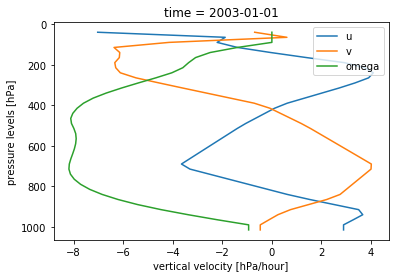

In [176]:
date = '2003-01-01T00:00'

va.u.sel(time=date).plot(y='lev', yincrease=False, label='u')
va.v.sel(time=date).plot(y='lev', yincrease=False, label='v')
va.omega.sel(time=date).plot(y='lev', yincrease=False, label='omega')
plt.legend()
plt.show()

In [18]:
va.u.sel(lev=1015).where(va.u.sel(lev=1015)>10, drop=True)

<xarray.DataArray 'u' (time: 44)>
array([10.085335, 10.705832, 11.551658, 11.370072, 10.678268, 10.740091,
       11.8737  , 12.017148, 11.625754, 11.382937, 11.339148, 10.777052,
       10.169214, 10.050641, 10.461676, 10.967996, 10.813021, 11.234301,
       12.048743, 12.235889, 11.88377 , 11.583679, 11.449782, 11.241889,
       11.214697, 11.910422, 12.598649, 12.606688, 11.981282, 11.414621,
       11.516279, 11.79564 , 11.6015  , 11.277607, 11.291434, 11.39519 ,
       10.83504 , 10.268467, 10.327168, 10.07219 , 10.739634, 10.683187,
       10.445496, 10.071856], dtype=float32)
Coordinates:
    lev      float32 1015.0
  * time     (time) datetime64[ns] 2002-02-10T12:00:00 ... 2012-01-25T18:00:00
Attributes:
    long_name:  Horizontal wind U component
    units:      m/s

In [20]:
va

<xarray.Dataset>
Dimensions:       (lev: 40, time: 19674)
Coordinates:
  * lev           (lev) float32 1015.0 990.0 965.0 940.0 ... 90.0 65.0 40.0
  * time          (time) datetime64[ns] 2001-10-26T06:00:00 ... 2015-04-14T12:00:00
Data variables:
    T             (time, lev) float32 ...
    r             (time, lev) float32 ...
    u             (time, lev) float32 ...
    v             (time, lev) float32 ...
    omega         (time, lev) float32 ...
    div           (time, lev) float32 ...
    T_adv_h       (time, lev) float32 ...
    T_adv_v       (time, lev) float32 ...
    r_adv_h       (time, lev) float32 ...
    r_adv_v       (time, lev) float32 ...
    s             (time, lev) float32 ...
    s_adv_h       (time, lev) float32 ...
    s_adv_v       (time, lev) float32 ...
    dsdt          (time, lev) float32 ...
    dTdt          (time, lev) float32 ...
    drdt          (time, lev) float32 ...
    q1            (time, lev) float32 ...
    q2            (time, lev) float32 .

In [140]:
va = xr.open_dataset('/g/data/ua8/Martin/va_analysis/syn599/CPOL_large-scale_forcing.nc')
T_mean = va.T.mean(dim='time')
integrand = -287.058 * T_mean /(9.807 * va.lev * 100) 
z = []
for i in range(len(integrand)):
    z.append(np.trapz(integrand[:i+1], va.lev[:i+1]*100))
z = np.round(np.array(z))
p = va.lev.values
va['lev'] = z
va = va.rename(lev='z')

va.z.attrs = {'units': 'm', 'long_name': 
                'height above ground level', 
                'axis':'Z'}
p = np.tile(p,[19674,1])
va['p'] = (['time', 'z'],p)

In [141]:
shear = va[['u','v']].sel(z=3000, method='nearest') - va[['u','v']].sel(z=0, method='nearest')

In [161]:
shear.u.sel(time=np.datetime64('2006-02-10T10:00'), method='nearest')

<xarray.DataArray 'u' ()>
array(-10.798518, dtype=float32)
Coordinates:
    time     datetime64[ns] 2006-02-10T12:00:00

In [163]:
shear.u.sel(time=np.datetime64('2006-02-10T08:00'), method='nearest')

<xarray.DataArray 'u' ()>
array(-10.894135, dtype=float32)
Coordinates:
    time     datetime64[ns] 2006-02-10T06:00:00